## Numerical Methods Week 2
# Systems of Linear Equations I
## Based on Tim Sauer's "Numerical Analysis" (Chapter 2, 2.1-2.4)

In this chapter, we are going to solve systems of equations. First, we are going to consider **linear systems**, say consisting of $n$ linear eqautions for $n$ unknowns:

$$ a_{11} x_1 + a_{12} x_2 + \cdots + a_{1n} x_n = b_1\\
a_{21} x_1 + a_{22} x_2 + \cdots + a_{2n} x_n = b_2\\
\vdots\\
a_{n1} x_1 + a_{n2} x_2 + \cdots + a_{nn} x_n = b_n$$

Apparently, this linear system is written in **matrix form** as:

$$ A\,x = b$$

where the $n \times n$ square matrix $A = A_{ij}$ is composed of the coefficients of the linear system, the $n$-dimensional vector $x$ of the unknowns and the $n$-dimensional vector $b$ of the rght-hand side values of the linear system.

A **permutation matrix** is a matrix obtained by permuting the rows of an $n \times n$ **identity matrix** $I$ according to some permutation of the numbers 1 to $n$ (denoting the indices of the rows of the identity matrix). For instance, the permutation $\pi = \begin{bmatrix}1 & 2 & 3 & 4 & 5\\ 1 & 4 & 2 & 5 & 3\end{bmatrix}$ corresponds to the permutation matrix:

$$P = \begin{bmatrix} 
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 0 & 1 & 0 & 0\end{bmatrix}$$

Notice that a permutation number is nonsingular with determinant $\pm1$ and such that:

$$P\,P^T = I$$

Therefore, $x$ solves $Ax = b$ if and only if $x$ solves $PAx = Pb$. In other words, permuting a linear system preserves its solutions.

Thus, by associating to a linear system $Ax = b$ the corresponding $n \times (n+1)$ **augmented matrix** $[A | b]$, the following three operations (called **elementary row operations**) can be applied to the augmented matrix in such a way that the transformed augmented matrix corresponds to an equivalent linear system of equations:
1. Swap one row for another.
2. Add or subtract a multiple of one row from another. 
3. Multiply a row by a nonzero constant.

A square matrix is called **lower triangular** if all the entries above the main diagonal are zero. Similarly, a square matrix is called **upper triangular** if all the entries below the main diagonal are zero. 

## 2.1 Gaussian Elimination

### 2.1.1 Naive Gaussian elimination

In its simplest (naive) form, **Gauss elimination** consists in a successive application of the 3 elementary row operations to the augmented matrix $[A | b]$ of a linear system $Ax = b$ until the finally transformed augmented matrix takes the form $[U | b^*]$, where $U$ is **upper triangular** and such that there are no zero elements on the diagonal of $U$. Subsequently, using **back substitution**, the equations of the equivalent system $Ux = b^*$ are immediately solved from the bottom up.

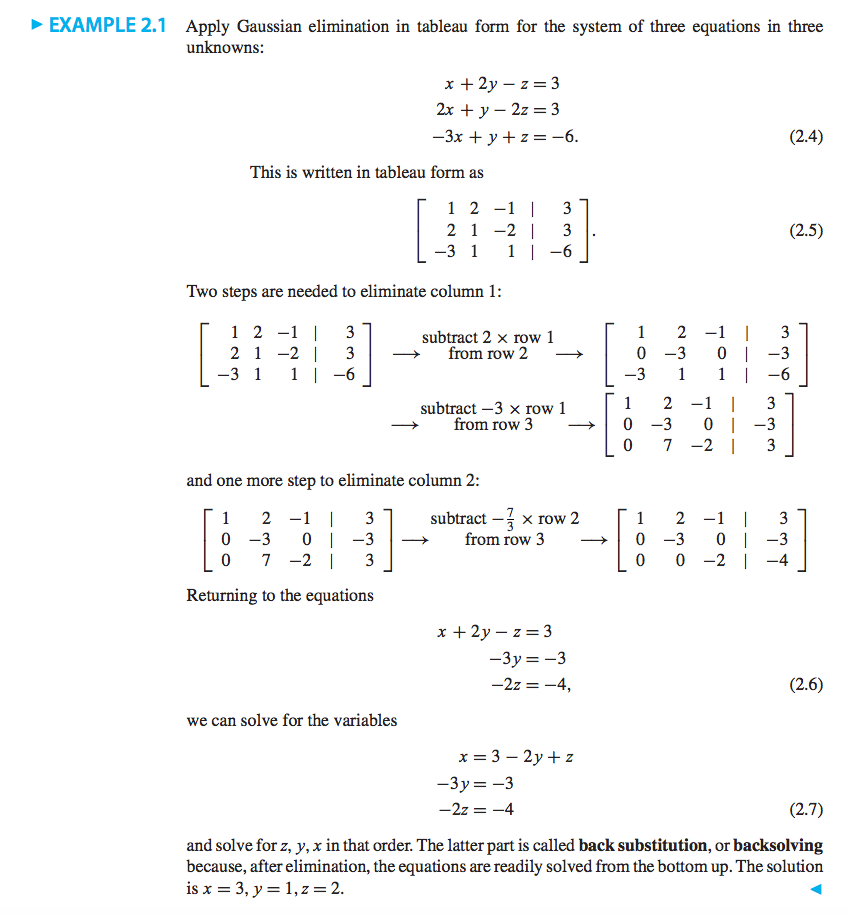

In [1]:
from IPython.display import Image
Image(filename='Images/02_1.png')

In [2]:
import numpy as np
from sympy import *
from sympy.matrices import Matrix
from numpy.linalg import solve
np.set_printoptions(suppress=True)

In [3]:
def gaussElimin(A, b):  
#     print("The augmented matrix of the linear system is:")
#     print(np.hstack([A, b.reshape(-1, 1)]))
#     print(' ')
    n = len(b)
    B=A.copy()
    c=b.copy()
    for row in range(0, n-1):
        for i in range(row+1, n):
            factor = B[i,row] / B[row,row]
            for j in range(row, n):
                B[i,j] = B[i,j] - factor * B[row,j]
            c[i] = c[i] - factor * c[row]
    U=B.copy()
#     Ua=np.hstack([U, c.reshape(-1, 1)])
    x=c.copy()
    for k in range(n-1,-1,-1):
        x[k] = (x[k] - np.dot(B[k,k+1:n],x[k+1:n]))/B[k,k]
    return U,c,x

Solve the following linear system by Gaussian elimination:

$$\begin{bmatrix}1 & 1 \\3 & -4\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = 
\begin{bmatrix}3\\2\end{bmatrix}$$

In [4]:
A = np.array([[1,1],[3,-4]])
b = np.array([3,2])

In [5]:
U,c,x=gaussElimin(A,b)
U=Matrix(U)
c=Matrix(c)
x=Matrix(x)
x1,x2 = symbols("x1 x2")
X=Matrix([x1,x2])

In [6]:
print_latex(U)
print_latex(X)
print_latex(c)
print_latex(x)

\left[\begin{matrix}1 & 1\\0 & -7\end{matrix}\right]
\left[\begin{matrix}x_{1}\\x_{2}\end{matrix}\right]
\left[\begin{matrix}3\\-7\end{matrix}\right]
\left[\begin{matrix}2\\1\end{matrix}\right]


$$\begin{bmatrix}1 & 1\\0 & -7\end{bmatrix} \begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = \begin{bmatrix}3\\-7\end{bmatrix}$$

$$\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = \begin{bmatrix}2\\1\end{bmatrix}$$

### <span style="color:#19bfc2">EXAMPLE 2.1</span>

Solve the following linear system by Gaussian elimination:

$$\begin{bmatrix}1 & 2 & -1\\2 & 1 & -2\\-3 & 1 & 1\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix} = 
\begin{bmatrix}3\\3\\-6\end{bmatrix}$$

In [7]:
A = np.array([[1,2,-1],[2,1,-2],[-3,1,1]])
b = np.array([3,3,-6])

In [8]:
U,c,x=gaussElimin(A,b)
U=Matrix(U)
c=Matrix(c)
x=Matrix(x)
x1,x2, x3 = symbols("x1 x2 x3")
X=Matrix([x1,x2,x3])

In [9]:
print_latex(U)
print_latex(X)
print_latex(c)
print_latex(x)

\left[\begin{matrix}1 & 2 & -1\\0 & -3 & 0\\0 & 0 & -2\end{matrix}\right]
\left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right]
\left[\begin{matrix}3\\-3\\-4\end{matrix}\right]
\left[\begin{matrix}3\\1\\2\end{matrix}\right]


$$\begin{bmatrix}1 & 2 & -1\\0 & -3 & 0\\0 & 0 & -2\end{bmatrix} \begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix} = \begin{bmatrix}3\\-3\\-4\end{bmatrix}$$

$$\begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix} = \begin{bmatrix}3\\1\\2\end{bmatrix}$$

### 2.1.2 Operation counts and complexity

By the shorthand terminology of "**big-O**", one simply means "on the order of." For example, if a scalar $a$ is $O(f(n))$ (writing $a = O(f(n))$), then for large enough $n$, $a \leq k \cdot f(n)$, for some constant $k$ (independent of $n$).

It can be proven that, for a system of $n$ equations in $n$ variables: 

* If the system is upper triangular, back-substitution can be completed in $n^2$ operations. Thus, back-substitution has (arithmetic) **complexity** of $O(n^2)$.
* Overall, the number of operations that Gaussian elimination takes is $2n^3/3 + n^2 \approx 2n^3/3$. Thus, Gaussian elimination has (arithmetic) **complexity** of $O(n^3)$.

### <span style="color:#19bfc2">EXAMPLE 2.2</span>

Estimate the time required to carry out back substitution on a system of 500 equations in 500 unknowns, on a computer where elimination takes 1 second.

In [10]:
bs=500**2
ge=2*500**3/3
t=1
# print('Number of operations for back-substitution is of the order', bs)
# print('Number of operations for Gauss elimination is of the order', ge)
print('Estimate of fraction of time of Gauss elimination for back-substitution is',t*bs/ge,'sec')

Estimate of fraction of time of Gauss elimination for back-substitution is 0.003 sec


### <span style="color:#19bfc2">EXAMPLE 2.3</span>

On a particular computer, back substitution of a $5000 \times 5000$ triangular matrix takes 0.1 seconds. Estimate the time needed to solve a general system of 3000 equations in 3000 unknowns by Gaussian elimination.

In [11]:
bs=5000**2
ge=2*3000**3/3
t=0.1
# print('Number of operations for back-substitution is of the order', bs)
# print('Number of operations for Gauss elimination is of the order', ge)
print('Estimate of fraction of time of Gauss elimination for back-substitution is',0.1*ge/bs,'sec')

Estimate of fraction of time of Gauss elimination for back-substitution is 72.0 sec


## 2.2 The LU Factorization

### 2.2.1 Matrix form of Gaussian elimination

The **LU factorization** is a matrix representation of Gaussian elimination. It consists of writing the coefficient matrix $A$ as $A = LU$, i.e., as a product of a lower triangular matrix $L$ and an upper triangular matrix $U$. 

### <span style="color:#19bfc2">EXAMPLE 2.4</span>

Find the LU factorization for the matrix:

$$A = \begin{bmatrix}1 & 1 \\3 & -4\end{bmatrix}$$

In [12]:
A = np.array([[1,1],[3,-4]])

In [13]:
A = Matrix(A)
L, U, _ = A.LUdecomposition()

In [14]:
print_latex(A)
print_latex(L)
print_latex(U)

\left[\begin{matrix}1 & 1\\3 & -4\end{matrix}\right]
\left[\begin{matrix}1 & 0\\3 & 1\end{matrix}\right]
\left[\begin{matrix}1 & 1\\0 & -7\end{matrix}\right]


$$A = \begin{bmatrix}1 & 1\\3 & -4\end{bmatrix} = LU = \begin{bmatrix}1 & 0\\3 & 1\end{bmatrix} \begin{bmatrix}1 & 1\\0 & -7\end{bmatrix}$$

### <span style="color:#19bfc2">EXAMPLE 2.5</span>

Find the LU factorization for the matrix:

$$A = \begin{bmatrix}1 & 2 & -1\\2 & 1 & -2\\-3 & 1 & 1\end{bmatrix}$$

In [15]:
A = np.array([[1,2,-1],[2,1,-2],[-3,1,1]])

In [16]:
A = Matrix(A)
L, U, _ = A.LUdecomposition()

In [17]:
print_latex(A)
print_latex(L)
print_latex(U)

\left[\begin{matrix}1 & 2 & -1\\2 & 1 & -2\\-3 & 1 & 1\end{matrix}\right]
\left[\begin{matrix}1 & 0 & 0\\2 & 1 & 0\\-3 & - \frac{7}{3} & 1\end{matrix}\right]
\left[\begin{matrix}1 & 2 & -1\\0 & -3 & 0\\0 & 0 & -2\end{matrix}\right]


$$A = \begin{bmatrix}1 & 2 & -1\\2 & 1 & -2\\-3 & 1 & 1\end{bmatrix} = LU = 
\begin{bmatrix}1 & 0 & 0\\2 & 1 & 0\\-3 & - \frac{7}{3} & 1\end{bmatrix} 
\begin{bmatrix}1 & 2 & -1\\0 & -3 & 0\\0 & 0 & -2\end{bmatrix}$$

### 2.2.2 Back substitution with the LU factorization

### <span style="color:#19bfc2">EXAMPLE 2.6</span>

Solve the following linear system by LU factorization:

$$\begin{bmatrix}1 & 1 \\3 & -4\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = 
\begin{bmatrix}3\\2\end{bmatrix}$$

In [18]:
A = np.array([[1,1],[3,-4]])
b = np.array([3,2])

In [19]:
A = Matrix(A)
L, U, _ = A.LUdecomposition()
x1,x2 = symbols("x1 x2")
X=Matrix([x1,x2])

In [20]:
print_latex(A)
print_latex(L)
print_latex(U)

\left[\begin{matrix}1 & 1\\3 & -4\end{matrix}\right]
\left[\begin{matrix}1 & 0\\3 & 1\end{matrix}\right]
\left[\begin{matrix}1 & 1\\0 & -7\end{matrix}\right]


$$A = \begin{bmatrix}1 & 1\\3 & -4\end{bmatrix} = LU = \begin{bmatrix}1 & 0\\3 & 1\end{bmatrix} \begin{bmatrix}1 & 1\\0 & -7\end{bmatrix}$$

In [21]:
L, U = np.array(L).astype(np.float64), np.array(U).astype(np.float64)
c=solve(L,b)
x=solve(U,c)
x=Matrix(x)
xx=Eq(X,x)
xx

Eq(Matrix([
[x1],
[x2]]), Matrix([
[2.0],
[1.0]]))

In [22]:
A = np.array([[1,1],[3,-4]])
A = Matrix(A)
A

Matrix([
[1,  1],
[3, -4]])

### <span style="color:#19bfc2">EXAMPLE 2.7</span>

Solve the following linear system by LU factorization:

$$\begin{bmatrix}1 & 2 & -1\\2 & 1 & -2\\-3 & 1 & 1\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix} = 
\begin{bmatrix}3\\3\\-6\end{bmatrix}$$

In [23]:
A = np.array([[1,2,-1],[2,1,-2],[-3,1,1]])
b = np.array([3,3,-6])

In [24]:
A = Matrix(A)
L, U, _ = A.LUdecomposition()
x1,x2, x3 = symbols("x1 x2 x3")
X=Matrix([x1,x2,x3])

In [25]:
print_latex(A)
print_latex(L)
print_latex(U)

\left[\begin{matrix}1 & 2 & -1\\2 & 1 & -2\\-3 & 1 & 1\end{matrix}\right]
\left[\begin{matrix}1 & 0 & 0\\2 & 1 & 0\\-3 & - \frac{7}{3} & 1\end{matrix}\right]
\left[\begin{matrix}1 & 2 & -1\\0 & -3 & 0\\0 & 0 & -2\end{matrix}\right]


$$A = \begin{bmatrix}1 & 2 & -1\\2 & 1 & -2\\-3 & 1 & 1\end{bmatrix} = LU = 
\begin{bmatrix}1 & 0 & 0\\2 & 1 & 0\\-3 & - \frac{7}{3} & 1\end{bmatrix} 
\begin{bmatrix}1 & 2 & -1\\0 & -3 & 0\\0 & 0 & -2\end{bmatrix}$$

In [26]:
L, U = np.array(L).astype(np.float64), np.array(U).astype(np.float64)
c=solve(L,b)
x=solve(U,c)
x=Matrix(x)
xx=Eq(X,x)
xx

Eq(Matrix([
[x1],
[x2],
[x3]]), Matrix([
[3.0],
[1.0],
[2.0]]))

In [27]:
# LU factorization in numpy (without sympy)

# def doolittle(A,b):
#     B=A.copy()
#     n = len(B)  #b
#     for k in range(0,n-1):
#         for i in range(k+1,n):
#             if B[i,k] != 0.0:
#                 lam = B[i,k]/B[k,k]
#                 B[i,k+1:n] = B[i,k+1:n] - lam*B[k,k+1:n]
#                 B[i,k] = lam
#     L=B.copy()
#     U=B.copy()
#     for k in range(0,n):  #
#         for i in range(k+1,n):  #
#             L[k,i]=0
#         L[k,k]=1  #i,i
# #     for k in range(0,n):
#         for i in range(0,k):  #
#             U[k,i]=0
#     LU=B
# #     c=b.copy()
#     y=np.zeros((1,n))  
#     for k in range(1,n):  #
#         y[k] = b[k] - np.dot(L[k,0:k],y[0:k])  #
#     for k in range(n-1,-1,-1):
#         x[k] = (y[k] - np.dot(U[k,k+1:n],y[k+1:n]))/U[k,k]
#     return L,U,LU,x

In [28]:
# A = np.array([[1,1],[3,-4]])
# b = np.array([3,2])
# print(A)
# L=doolittle(A,b)[0] #,U,LU
# U=doolittle(A,b)[1]
# LU=doolittle(A,b)[2]
# x=doolittle(A,b)[3]
# print(L)
# print(U)
# print(LU)
# print(np.dot(L,U))
# print(x)
# print(solve(A,b))

### 2.2.3 Complexity of the LU factorization

Suppose that we want to solve $k$ linear systems with the same $n \times n$ matrix $A$ and with $k$ different right-habd sides $b$. It can be shown that the approximate **number of operations** with the LU approach for matrix $A$ is $2n^3/3$, i.e., LU factorization has the same (arithmetic) **complexity** of $O(n^3)$ with Gaussian elimination. Therefore, since for both back- and the forward-substitution in the LU factorization the approximate number of operations is $2n^2$, the approximate number of operations to solve the $k$ linear systems through LU factorization of $A$ (which is the same for all systems) is $2n^3/3 + 2kn^2$.

### <span style="color:#19bfc2">EXAMPLE 2.8</span>

Assume that it takes one second to factorize the $300 \times 300$ matrix $A$ into $A = LU$. How many problems $Ax = b_1, \ldots,Ax = b_k$ can be solved in the next second?

In [29]:
n, t = symbols('n t')

bs=2*n**2
ge=2*n**3/3
r=t*ge/bs
r 

n*t/3

In [30]:
print("The approximate number of such that can be handled per second is",float(r.subs(t,1).subs(n,300)))

The approximate number of such that can be handled per second is 100.0


### <span style="color:#19bfc2">EXAMPLE 2.9</span>

Prove that $A = \begin{bmatrix}0 & 1\\1 & 1\end{bmatrix}$ does not have an $LU$ factorization.

In [31]:
A=Matrix([[0,1],[1,1]])
a,b,c,d = symbols('a b c d')
L=Matrix([[1,0],[a,1]])
U=Matrix([[b,c],[0,d]])
LU=L*U

In [32]:
print_latex(A)
print_latex(L)
print_latex(U)
print_latex(LU)

\left[\begin{matrix}0 & 1\\1 & 1\end{matrix}\right]
\left[\begin{matrix}1 & 0\\a & 1\end{matrix}\right]
\left[\begin{matrix}b & c\\0 & d\end{matrix}\right]
\left[\begin{matrix}b & c\\a b & a c + d\end{matrix}\right]


$$A = \begin{bmatrix}0 & 1\\1 & 1\end{bmatrix} = LU = \begin{bmatrix}1 & 0\\a & 1\end{bmatrix} \begin{bmatrix}b & c\\0 & d\end{bmatrix} = \begin{bmatrix}b & c\\a b & a c + d\end{bmatrix}$$

Equating coefficients yields $b = 0$ and $ab = 1$, a contradiction.

## 2.3 Sources of Error

The **infinity norm** (or **maximum norm**) of the vector $x = (x_1, \ldots,x_n)$ is defined as $||x||_\infty = max\{|x_i|: i = 1, \ldots,n\}$, that is, the maximum of the absolute values of the components of $x$.

Let $x_a$ be an approximate solution of the linear system $Ax = b$. 

The **residual** is the vector $r = b − Ax_a$. The **backward error** is the infinity norm of the residual $||b − Ax_a||_\infty$, and the **forward error** is $||x − x_a||_\infty$.

The **relative backward error** of system $Ax = b$ is defined to be:

$$\frac{||r||_\infty}{||b||_\infty}$$

and the **relative forward error** is:

$$\frac{||x - x_a||_\infty}{||x||_\infty}$$

The **error magnification factor** for $Ax = b$ is the ratio of the two relative errors:

$$\mbox{ error magnification factor } = \frac{\mbox{ relative forward error }}{\mbox{ relative backward error }}$$

The *condition number* of a square matrix $A$, denoted as $\mbox{cond }(A)$, is the maximum possible error magnification factor for solving $Ax = b$, over all right-hand sides $b$.

*Theorem*. The condition number of the $n \times n$ matrix $A$ is:

$$\mbox{cond }(A) = ||A||_\infty \cdot ||A^{-1}||_\infty$$

### <span style="color:#19bfc2">EXAMPLE 2.10</span>

Find the backward and forward errors for the approximate solution $x_a = [1, 1]$ of the linear system:

$$\begin{bmatrix}1 & 1 \\3 & -4\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = 
\begin{bmatrix}3\\2\end{bmatrix}$$

In [33]:
A = np.array([[1,1],[3,-4]])
b = np.array([3,2])
U,c,x=gaussElimin(A,b)
xa = np.array([1,1])
ba=b-np.dot(A,xa)
fo=x-xa

In [34]:
A=Matrix(A)
b=Matrix(b)
x=Matrix(x)
xa=Matrix(xa)
ba=Matrix(ba)
fo=Matrix(fo)

In [35]:
print_latex(A)
print_latex(b)
print_latex(x)
print_latex(xa)
print_latex(ba)
print_latex(fo)

\left[\begin{matrix}1 & 1\\3 & -4\end{matrix}\right]
\left[\begin{matrix}3\\2\end{matrix}\right]
\left[\begin{matrix}2\\1\end{matrix}\right]
\left[\begin{matrix}1\\1\end{matrix}\right]
\left[\begin{matrix}1\\3\end{matrix}\right]
\left[\begin{matrix}1\\0\end{matrix}\right]


In [36]:
import mpmath as mp
mp.dps=15; mp.pretty=False

A=Matrix(A)
b=Matrix(b)
xa=Matrix(xa)
x=Matrix(x)

be=max(abs(b-A*xa))
fe=max(abs(x-xa))
print("Forward error =",be)
print("Backward error =",fe)

Forward error = 3
Backward error = 1


$${\mbox{backward error }} = ||b - A x_a||_{\infty} = \Big|\Big|\begin{bmatrix}3\\2\end{bmatrix} -  
\begin{bmatrix}1 & 1\\3 & -4\end{bmatrix} \begin{bmatrix}1\\1\end{bmatrix}
\Big|\Big|_{\infty} = \Big|\Big| \begin{bmatrix}1\\3\end{bmatrix}\Big|\Big|_{\infty} = 3$$

$${\mbox{forward error }} = ||x - x_a||_{\infty} = \Big|\Big|\begin{bmatrix}2\\1\end{bmatrix} - \begin{bmatrix}1\\1\end{bmatrix}  \Big|\Big|_{\infty} = \Big|\Big| \begin{bmatrix}1\\0\end{bmatrix} \Big|\Big|_{\infty} = 1$$

### <span style="color:#19bfc2">EXAMPLE 2.11</span>

Find the backward and forward errors for the approximate solution $x_a = [-1, 3.0001]$ of the linear system:

$$\begin{bmatrix}1 & 1 \\1.0001 & 1\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = 
\begin{bmatrix}2\\2.0001\end{bmatrix}$$

In [37]:
A = np.array([[1,1],[1.0001,1]], dtype='float')
b = np.array([2,2.0001], dtype='float')
U,c,x=gaussElimin(A,b)
xa = np.array([-1,3.0001], dtype='float')
ba=b-np.dot(A,xa)
fo=x-xa

In [38]:
x[0],x[1]=floor(x[0]),ceiling(x[1])
x=np.array([x[0],x[1]])
x=Matrix(x)
x1,x2 = symbols("x1 x2")
X=Matrix([x1,x2])
xx=Eq(X,x)
print('The exact solution of this system is:')
xx

The exact solution of this system is:


Eq(Matrix([
[x1],
[x2]]), Matrix([
[1.0],
[1.0]]))

In [39]:
A=Matrix(A)
b=Matrix(b)
x=Matrix(x)
xa=Matrix(xa)
ba=Matrix(ba)
fo=Matrix(fo)

In [40]:
print_latex(A)
print_latex(b)
print_latex(x)
print_latex(xa)
print_latex(ba)
print_latex(fo)

\left[\begin{matrix}1.0 & 1.0\\1.0001 & 1.0\end{matrix}\right]
\left[\begin{matrix}2.0\\2.0001\end{matrix}\right]
\left[\begin{matrix}1.0\\1.0\end{matrix}\right]
\left[\begin{matrix}-1.0\\3.0001\end{matrix}\right]
\left[\begin{matrix}-0.000100000000000211\\0.000100000000000211\end{matrix}\right]
\left[\begin{matrix}2.00000000000222\\-2.00010000000222\end{matrix}\right]


In [41]:
be=max(abs(b-A*xa))
fe=max(abs(x-xa))
print("Forward error =",round(be,4))
print("Backward error =",round(fe,4))

Forward error = 0.0001
Backward error = 2.0001


$${\mbox{backward error }} = ||b - A x_a||_{\infty} = \Big|\Big|\begin{bmatrix}2.0\\2.0001\end{bmatrix} -  
\begin{bmatrix}1.0 & 1.0\\1.0001 & 1.0\end{bmatrix} \begin{bmatrix}-1.0\\3.0001\end{bmatrix}
\Big|\Big|_{\infty} = \Big|\Big| \begin{bmatrix}-0.0001\\0.0001\end{bmatrix}\Big|\Big|_{\infty} = 0.0001$$

$${\mbox{forward error }} = ||x - x_a||_{\infty} = \Big|\Big|\begin{bmatrix}1\\1\end{bmatrix} - \begin{bmatrix}-1.0\\3.0001\end{bmatrix}  \Big|\Big|_{\infty} = \Big|\Big| \begin{bmatrix}2.0000\\-2.0001\end{bmatrix} \Big|\Big|_{\infty} = 2.0001$$

In [42]:
A = np.array(A).astype(np.float64)
print("The infinity norm of A is",round(np.linalg.norm(A, np.inf),4))
Ainv = np.linalg.inv(A)
print("The infinity norm of A-1 is",round(np.linalg.norm(Ainv, np.inf),4))
print("The condition number of A is",round(np.linalg.norm(A, np.inf)*np.linalg.norm(Ainv, np.inf),4))

The infinity norm of A is 2.0001
The infinity norm of A-1 is 20001.0
The condition number of A is 40004.0001


### <span style="color:#19bfc2">EXAMPLE 2.12</span>

Let $H$ denote the $n \times n$ **Hilbert matrix**. Compute the solution of $H x = b$, where $b = H \cdot [1, \ldots,1]^T$, for $n = 6$ and 10.

In [43]:
from scipy.linalg import hilbert

n=6

A=hilbert(n)
b=np.dot(A,[1,1,1,1,1,1])
x = np.linalg.solve(A, b)
print("The solution of Hx=b is",x,'\n')
Ainv = np.linalg.inv(A)
c='%.14E' % float(np.linalg.norm(A, np.inf)*np.linalg.norm(Ainv, np.inf))
print("The condition number of A is",c)

The solution of Hx=b is [1. 1. 1. 1. 1. 1.] 

The condition number of A is 2.90702790037906E+07


In [44]:
n=10

A=hilbert(n)
b=np.dot(A,[1,1,1,1,1,1,1,1,1,1])
x = np.linalg.solve(A, b)
print("The solution of Hx=b is",x,'\n')
Ainv = np.linalg.inv(A)
c='%.14E' % float(np.linalg.norm(A, np.inf)*np.linalg.norm(Ainv, np.inf))
print("The condition number of A is",c)

The solution of Hx=b is [1.         0.99999996 1.00000087 0.99999211 1.00003756 0.99989682
 1.00016919 0.99983655 1.00008579 0.99998114] 

The condition number of A is 3.53568476105171E+13


### 2.3.2 Swamping

### <span style="color:#19bfc2">EXAMPLE 2.13</span>

Solve the following linear system (i) by manual calculation of Gauss elimination, (ii) by (computed) LU factorization and (iii) by (computed) LU factorization after interchanging the two equations:

$$\begin{bmatrix}10^{-20} & 1 \\1 & 2\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = 
\begin{bmatrix}1\\4\end{bmatrix}$$

#### (i) Manual calculation

After subtracting $10^{20} \, \times$ row 1 from row 1, we get:

$$\begin{bmatrix}10^{-20} & 1 \\0 & 2 - 10^{-20}\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = 
\begin{bmatrix}1\\4 - 10^{20}\end{bmatrix}$$

The second equation results:

$$x_2 = \frac{4 - 10^{20}}{2 - 10^{20}} \approx 1$$

and substituting in the first equation we get:

$$x_1 = \frac{2 \times 10^{20}}{10^{20} - 2} \approx 2$$

Therefore, the solution is:

$$\begin{bmatrix}x_1\\x_2\end{bmatrix} \approx \begin{bmatrix}2\\1\end{bmatrix}$$

#### (ii) Direct LU factorization

In [45]:
A = np.array([[1e-20,1.],[1.,2.]])
b = np.array([1.,4.])

In [46]:
A = Matrix(A)
L, U, _ = A.LUdecomposition()
x1,x2 = symbols("x1 x2")
X=Matrix([x1,x2])

In [47]:
L, U = np.array(L).astype(np.float64), np.array(U).astype(np.float64)
c=solve(L,b)
x=solve(U,c)
x=Matrix(x)
xx=Eq(X,x)
print("The computed solution is:")
xx
print("But this is NOT the correct solution!")

The computed solution is:
But this is NOT the correct solution!


#### (iii) LU factorization after interchanging equations 1 and 2

In [48]:
A = np.array([[1,2],[1e-20,1]])
b = np.array([4,1])

In [49]:
A = Matrix(A)
L, U, _ = A.LUdecomposition()
x1,x2 = symbols("x1 x2")
X=Matrix([x1,x2])

In [50]:
L, U = np.array(L).astype(np.float64), np.array(U).astype(np.float64)
c=solve(L,b)
x=solve(U,c)
x=Matrix(x)
xx=Eq(X,x)
print("The solution is:")
xx
print("But this IS the correct solution!")

The solution is:
But this IS the correct solution!


## 2.4 The PA = LU Factorization

### 2.4.1 Pivoting

The last example has demonstrated that it is sometimes essential to reorder the equations during the elimination phase. Actually, in the context of Gauss elimination, we may call "**pivots**" the diagonal elements of the resulting upper triangular matrix. Obviously, back substitution is going to fail, if there is a pivot which is either 0 or very small compared to other elements in the pivot row (Example 2.13). This is why row reordering is needed before Gauss elimination (or LU factorization) might be initiated. 

The **pivoting** protocol consists of comparing the elements of columns of the matrix $A$ of a linear system. Without any loss of generality, let us assume that matrix $A = \{a_{ij}\}$ is of order 3.

First, the largest (in absolute value and nonzero) entry $a_{p1}$ of the first column is located. This entry is the first pivot. The first pivot row is swapped with the top row. 

Subsequently, we consider the (two) entries of the second column (after the previous row reordering), excluding the already swapped entry of the (reordered) first row. Let $a_{p2}$ be the largest (in absolute value  and nonzero) entry among these (two) entries. Then its row is swapped with the second row from top. (of course, if the order of $A$ was $n > 3$, we can repeat the last step $n - 1$ times exactly in a similar way. However, many times, the first few reorderings suffice, in which case we are talking of a **partial pivoting**.) 

Notice that the applied successive row reordings can be recorded in a permutation matrix $P$. In what follows, we are going either to find $P$ by direct inspection or calculate it through the *scipy* module.

At the end, we are going to apply $LU$ factorization on the permuted matrix $PA$ of the original matrix $A$ of our linear system.

### <span style="color:#19bfc2">EXAMPLE 2.14</span>

Solve the following linear system by PA = LU factorization:

$$\begin{bmatrix}1 & 1 \\3 & -4\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = 
\begin{bmatrix}3\\2\end{bmatrix}$$

In [51]:
A = np.array([[1,1],[3,-4]])
b = np.array([3,2])

The first (and only) pivot is the element 3 on the first column, implying that the second row should be swapped with the first. Thus the permutation matrix is:

In [52]:
P = np.array([[0,1],[1,0]])

$$P = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}$$

In [53]:
# Computation of the permutation matrix through scipy

import scipy.linalg as la

P, _, _ = la.lu(A)
P

array([[0., 1.],
       [1., 0.]])

In [54]:
A = Matrix(A)
P = Matrix(P)
PA = Matrix(np.dot(P,A))
Pb = Matrix(np.dot(P,b))
L, U, _ = PA.LUdecomposition()
x1,x2 = symbols("x1 x2")
X=Matrix([x1,x2])

In [55]:
print_latex(A)
print_latex(P)
print_latex(PA)
print_latex(L)
print_latex(U)

\left[\begin{matrix}1 & 1\\3 & -4\end{matrix}\right]
\left[\begin{matrix}0.0 & 1.0\\1.0 & 0.0\end{matrix}\right]
\left[\begin{matrix}3.0 & -4.0\\1.0 & 1.0\end{matrix}\right]
\left[\begin{matrix}1 & 0\\0.333333333333333 & 1\end{matrix}\right]
\left[\begin{matrix}3.0 & -4.0\\0 & 2.33333333333333\end{matrix}\right]


$$PA = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix} \begin{bmatrix}1 & 1\\3 & -4\end{bmatrix} = \begin{bmatrix}3 & -4\\1 & 1\end{bmatrix} = LU = \begin{bmatrix}1 & 0\\\frac{1}{3} & 1\end{bmatrix} \begin{bmatrix}3 & -4\\0 & \frac{7}{3}\end{bmatrix}$$

In [56]:
L, U = np.array(L).astype(np.float64), np.array(U).astype(np.float64)
Pb=np.array(Pb).astype(np.float64)
c=solve(L,Pb)
x=solve(U,c)
x=Matrix(x)
xx=Eq(X,x)
print("The solution is:")
xx

The solution is:


Eq(Matrix([
[x1],
[x2]]), Matrix([
[2.0],
[1.0]]))

### <span style="color:#19bfc2">EXAMPLE 2.15</span>

Solve the following linear system by PA = LU factorization:

$$\begin{bmatrix}1 & -1 & 3\\-1 & 0 & -2\\2 & 2 & 4\end{bmatrix} \begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix} = 
\begin{bmatrix}-3\\1\\0\end{bmatrix}$$

In [57]:
A = np.array([[1,-1,3],[-1,0,-2],[2,2,4]])
b = np.array([-3,1,0])

The first pivot is the element 2 on the first column, implying that the third row should be swapped with the first. The second pivot is the element $-1$ which is relocated on the third row, implying that the (relocated) third row should be swapped with the second. Thus the permutation matrix is:

In [58]:
P = np.array([[0,0,1],[1,0,0],[0,1,0]])

$$P = \begin{bmatrix}0 & 0 & 1\\1 & 0 & 0\\0 & 1 & 0\end{bmatrix}$$

In [59]:
# Computation of the permutation matrix through scipy

import scipy.linalg as la

P, L1, U1 = la.lu(A.T)
P

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Notice that the permutation matrix computed by scipy is the transpose of the one we have found (which is OK, because in this case partial pivoting suffices to solve the system by elimination!).

In [60]:
A = Matrix(A)
P = Matrix(P)
PA = Matrix(np.dot(P,A))
Pb = Matrix(np.dot(P,b))
L, U, _ = PA.LUdecomposition()
x1,x2,x3 = symbols("x1 x2 x3")
X=Matrix([x1,x2,x3])

In [61]:
print_latex(A)
print_latex(P)
print_latex(PA)
print_latex(L)
print_latex(U)

\left[\begin{matrix}1 & -1 & 3\\-1 & 0 & -2\\2 & 2 & 4\end{matrix}\right]
\left[\begin{matrix}0.0 & 0.0 & 1.0\\0.0 & 1.0 & 0.0\\1.0 & 0.0 & 0.0\end{matrix}\right]
\left[\begin{matrix}2.0 & 2.0 & 4.0\\-1.0 & 0 & -2.0\\1.0 & -1.0 & 3.0\end{matrix}\right]
\left[\begin{matrix}1 & 0 & 0\\-0.5 & 1 & 0\\0.5 & -2.0 & 1\end{matrix}\right]
\left[\begin{matrix}2.0 & 2.0 & 4.0\\0 & 1.0 & 0\\0 & 0 & 1.0\end{matrix}\right]


$$PA = \begin{bmatrix}0 & 0 & 1\\1 & 0 & 0\\0 & 1 & 0\end{bmatrix} \begin{bmatrix}1 & -1 & 3\\-1 & 0 & -2\\2 & 2 & 4\end{bmatrix} = LU = \begin{bmatrix}1 & 0 & 0\\\frac{1}{2} & 1 & 0\\- \frac{1}{2} & - \frac{1}{2} & 1\end{bmatrix} \begin{bmatrix}2 & 2 & 4\\0 & -2 & 1\\0 & 0 & \frac{1}{2}\end{bmatrix}$$

In [62]:
L, U = np.array(L).astype(np.float64), np.array(U).astype(np.float64)
Pb=np.array(Pb).astype(np.float64)
c=solve(L,Pb)
x=solve(U,c)
x=Matrix(x)
xx=Eq(X,x)
print("The solution is:")
xx

The solution is:


Eq(Matrix([
[x1],
[x2],
[x3]]), Matrix([
[ 1.0],
[ 1.0],
[-1.0]]))

### <span style="color:#19bfc2">EXAMPLE 2.16</span>

Find the PA = LU factorization of the following matrix:

$$A = \begin{bmatrix}2 & 1 & 5\\4 & 4 & -4\\1 & 3 & 1\end{bmatrix}$$ 

In [63]:
A = np.array([[2,1,5],[4,4,-4],[1,3,1]])

The first pivot is the element 4 on the first column, implying that the second row should be swapped with the first. The second pivot is the element $3$ on the third row, implying that the third row should be swapped with the (relocated) second. Thus the permutation matrix is:

In [64]:
P = np.array([[0,1,0],[0,0,1],[1,0,0]])

$$P = \begin{bmatrix}0 & 1 & 0\\0 & 0 & 1\\1 & 0 & 0\end{bmatrix}$$

In [65]:
# Computation of the permutation matrix through scipy

import scipy.linalg as la

P, L1, U1 = la.lu(A)
P

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Notice that the permutation matrix computed by scipy is the transpose of the one we have found (which is OK, because in this case partial pivoting suffices to solve the system by elimination!).

In [66]:
A = Matrix(A)
P = Matrix(P)
PA = Matrix(np.dot(P,A))
L, U, _ = PA.LUdecomposition()
x1,x2,x3 = symbols("x1 x2 x3")
X=Matrix([x1,x2,x3])

In [67]:
print_latex(A)
print_latex(P)
print_latex(PA)
print_latex(L)
print_latex(U)

\left[\begin{matrix}2 & 1 & 5\\4 & 4 & -4\\1 & 3 & 1\end{matrix}\right]
\left[\begin{matrix}0.0 & 0.0 & 1.0\\1.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0\end{matrix}\right]
\left[\begin{matrix}1.0 & 3.0 & 1.0\\2.0 & 1.0 & 5.0\\4.0 & 4.0 & -4.0\end{matrix}\right]
\left[\begin{matrix}1 & 0 & 0\\2.0 & 1 & 0\\4.0 & 1.6 & 1\end{matrix}\right]
\left[\begin{matrix}1.0 & 3.0 & 1.0\\0 & -5.0 & 3.0\\0 & 0 & -12.8\end{matrix}\right]


$$PA = \begin{bmatrix}0 & 1 & 0\\0 & 0 & 1\\1 & 0 & 0\end{bmatrix} \begin{bmatrix}2 & 1 & 5\\4 & 4 & -4\\1 & 3 & 1\end{bmatrix} = \begin{bmatrix}4 & 4 & -4\\1 & 3 & 1\\2 & 1 & 5\end{bmatrix} = LU = \begin{bmatrix}1 & 0 & 0\\\frac{1}{4} & 1 & 0\\\frac{1}{2} & - \frac{1}{2} & 1\end{bmatrix} \begin{bmatrix}4 & 4 & -4\\0 & 2 & 2\\0 & 0 & 8\end{bmatrix}$$

### <span style="color:#19bfc2">EXAMPLE 2.17</span>

Solve the following linear system by PA = LU factorization:

$$\begin{bmatrix}2 & 1 & 5\\4 & 4 & -4\\1 & 3 & 1\end{bmatrix} \begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix}= \begin{bmatrix}5\\0\\6\end{bmatrix}$$ 

In [68]:
b = np.array([5, 0, 6])

In [69]:
b = Matrix(b)
print_latex(b)

\left[\begin{matrix}5\\0\\6\end{matrix}\right]


In [70]:
A = Matrix(A)
P = Matrix(P)
PA = Matrix(np.dot(P,A))
Pb = Matrix(np.dot(P,b))
L, U, _ = PA.LUdecomposition()
x1,x2,x3 = symbols("x1 x2 x3")
X=Matrix([x1,x2,x3])

In [71]:
L, U = np.array(L).astype(np.float64), np.array(U).astype(np.float64)
Pb=np.array(Pb).astype(np.float64)
c=solve(L,Pb)
x=solve(U,c)
x=Matrix(x)
xx=Eq(X,x)
print("The solution is:")
xx

The solution is:


Eq(Matrix([
[x1],
[x2],
[x3]]), Matrix([
[-1.0],
[ 2.0],
[ 1.0]]))

### <span style="color:#19bfc2">EXAMPLE 2.18</span>

Solve the following linear system by PA = LU factorization:

$$\begin{bmatrix}2 & 3 \\3 & 2\end{bmatrix}
\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = 
\begin{bmatrix}4\\1\end{bmatrix}$$

In [72]:
A = np.array([[2,3],[3,2]])
b = np.array([4,1])  

The first (and only) pivot is the element 3 on the first column, implying that the second row should be swapped with the first. Thus the permutation matrix is:

In [73]:
P = np.array([[0,1],[1,0]])

$$P = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}$$

In [74]:
# Computation of the permutation matrix through scipy

import scipy.linalg as la

P, L1, U1 = la.lu(A)
P

array([[0., 1.],
       [1., 0.]])

In [75]:
A = Matrix(A)
P = Matrix(P)
PA = Matrix(np.dot(P,A))
Pb = Matrix(np.dot(P,b))
L, U, _ = PA.LUdecomposition()
x1,x2 = symbols("x1 x2")
X=Matrix([x1,x2])

In [76]:
print_latex(A)
print_latex(P)
print_latex(PA)
print_latex(L)
print_latex(U)

\left[\begin{matrix}2 & 3\\3 & 2\end{matrix}\right]
\left[\begin{matrix}0.0 & 1.0\\1.0 & 0.0\end{matrix}\right]
\left[\begin{matrix}3.0 & 2.0\\2.0 & 3.0\end{matrix}\right]
\left[\begin{matrix}1 & 0\\0.666666666666667 & 1\end{matrix}\right]
\left[\begin{matrix}3.0 & 2.0\\0 & 1.66666666666667\end{matrix}\right]


$$PA = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix} \begin{bmatrix}2 & 3\\3 & 2\end{bmatrix} = \begin{bmatrix}3 & 2\\2 & 3\end{bmatrix} = LU = \begin{bmatrix}1 & 0\\\frac{2}{3} & 1\end{bmatrix} \begin{bmatrix}3 & 2\\0 & \frac{5}{3}\end{bmatrix}$$

In [77]:
L, U = np.array(L).astype(np.float64), np.array(U).astype(np.float64)
Pb=np.array(Pb).astype(np.float64)
c=solve(L,Pb)
x=solve(U,c)
x=Matrix(x)
xx=Eq(X,x)
print("The solution is:")
xx

The solution is:


Eq(Matrix([
[x1],
[x2]]), Matrix([
[-1.0],
[ 2.0]]))